## 영어, 영단어 키워드 분석

### 패키지 설치



In [3]:
# # word cloud 설치

# !pip install wordcloud

### 패키지 임포트

In [4]:
# !pip install nltk

In [5]:
from wordcloud import WordCloud, STOPWORDS
import glob
import pandas as pd
from functools import reduce
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
import re

#### nltk resource 다운로드

In [6]:
import nltk

In [7]:
# nltk.download()

In [8]:
all_files = glob.glob('./data/myCabinetExcelData*.xls')
all_files

['./data\\myCabinetExcelData (1).xls',
 './data\\myCabinetExcelData (2).xls',
 './data\\myCabinetExcelData.xls']

In [9]:
all_data = []
for file in all_files:
    df = pd.read_excel(file)
    all_data.append(df)

all_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,"Semantic Computing for Big Data: Approaches, T...","Jeong, Seung Ryul",Korean Society for Internet Information,2014
1,NaN,2,A study on changes in domestic tourism trends ...,"Yoo, Kyoung-mi",The Institute of Internet,2022
2,NaN,3,A Study on Changes in Korean Image of Foreign ...,"Yoo, Kyoung-Mi",The Institute of Internet,2021
3,NaN,4,"How do People Understand and Express ""Smart Ci...","Kim, Seong-A",Architectural Institute of Korea,2022
4,NaN,5,Customer Credit Evaluation Using Big Data of M...,Ying Wang(왕잉),한국경영학회,2018
5,NaN,6,Utilization and Analysis of Big-data,Soowook Lee,국제문화기술진흥원,2019
6,NaN,7,Private information protection method and coun...,Sunghyuck Hong,한국융합학회,2018
7,NaN,8,IoT-Based Health Big-Data Process Technologies...,"Yoo, Hyun",Korean Society for Internet Information,2021
8,NaN,9,Utilization and Analysis of Big-data,이수욱,국제문화기술진흥원,2019
9,NaN,10,Utilization and Analysis of Big-data,"Lee, Soowook",The International Promotion Agency of Culture ...,2019


### 안되면 xlrd 설치

In [10]:
all_data_concat = pd.concat(all_data, axis=0, ignore_index=True)

In [11]:
all_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,"Semantic Computing for Big Data: Approaches, T...","Jeong, Seung Ryul",Korean Society for Internet Information,2014
1,NaN,2,A study on changes in domestic tourism trends ...,"Yoo, Kyoung-mi",The Institute of Internet,2022
2,NaN,3,A Study on Changes in Korean Image of Foreign ...,"Yoo, Kyoung-Mi",The Institute of Internet,2021
3,NaN,4,"How do People Understand and Express ""Smart Ci...","Kim, Seong-A",Architectural Institute of Korea,2022
4,NaN,5,Customer Credit Evaluation Using Big Data of M...,Ying Wang(왕잉),한국경영학회,2018
...,...,...,...,...,...,...
515,NaN,496,A Divided Regression Analysis for Big Data,Sunghae Jun,보안공학연구지원센터,2015
516,NaN,497,Implementation of a resident night float syste...,Hyeong Won Yu,대한외과학회,2019
517,NaN,498,"Analysis of Covid-19, Tourism, Stress Keywords...",Su-Hyun Yun,국제문화기술진흥원,2022
518,NaN,499,Customer Classification and Market Basket Anal...,리우룬칭,한국지식경영학회,2018


In [12]:
all_data_concat.to_csv('./data/riss_bigdata.csv', index=False, encoding='utf-8')

In [13]:
all_title = all_data_concat['제목']
all_title

0      Semantic Computing for Big Data: Approaches, T...
1      A study on changes in domestic tourism trends ...
2      A Study on Changes in Korean Image of Foreign ...
3      How do People Understand and Express "Smart Ci...
4      Customer Credit Evaluation Using Big Data of M...
                             ...                        
515           A Divided Regression Analysis for Big Data
516    Implementation of a resident night float syste...
517    Analysis of Covid-19, Tourism, Stress Keywords...
518    Customer Classification and Market Basket Anal...
519    A Study on Customer Feedback by VOC Big Data A...
Name: 제목, Length: 520, dtype: object

In [14]:
stopWords = set(stopwords.words('english'))
stopWords


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [15]:
lemma = WordNetLemmatizer()



In [16]:
words=[]

for title in all_title:
    EnWords = re.sub(r'[^a-zA-Z]+', ' ', str(title))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    
    words.append(EnWordsTokenStopLemma)

####     EnWords = re.sub(r'^[a-zA-Z]+', ' ', str(title)) 로 넣으면 다르게나옴

In [17]:
print(words) # 불용어 제거하고 남은 키워드.

[['semantic', 'computing', 'big', 'data', 'approach', 'tool', 'emerging', 'direction', 'semantic', 'computing', 'big', 'data', 'approach', 'tool', 'emerging', 'direction'], ['study', 'change', 'domestic', 'tourism', 'trend', 'using', 'social', 'big', 'data', 'analysis', 'comparison', 'covid', 'study', 'change', 'domestic', 'tourism', 'trend', 'using', 'social', 'big', 'data', 'analysis', 'comparison', 'covid'], ['study', 'change', 'korean', 'image', 'foreign', 'tourist', 'using', 'big', 'data', 'post', 'covid', 'study', 'change', 'korean', 'image', 'foreign', 'tourist', 'using', 'big', 'data', 'post', 'covid'], ['people', 'understand', 'express', 'smart', 'city', 'analysis', 'transition', 'smart', 'city', 'keywords', 'semantic', 'network', 'analysis', 'sn', 'big', 'data', 'people', 'understand', 'express', 'quot', 'smart', 'city', 'quot', 'analysis', 'transition', 'smart', 'city', 'keywords', 'semantic', 'network', 'analysis', 'sn', 'big', 'data'], ['customer', 'credit', 'evaluation', 

In [18]:
words_reduce = list(reduce(lambda x,y: x+y, words))
print(words_reduce)
#차원 축소했음

['semantic', 'computing', 'big', 'data', 'approach', 'tool', 'emerging', 'direction', 'semantic', 'computing', 'big', 'data', 'approach', 'tool', 'emerging', 'direction', 'study', 'change', 'domestic', 'tourism', 'trend', 'using', 'social', 'big', 'data', 'analysis', 'comparison', 'covid', 'study', 'change', 'domestic', 'tourism', 'trend', 'using', 'social', 'big', 'data', 'analysis', 'comparison', 'covid', 'study', 'change', 'korean', 'image', 'foreign', 'tourist', 'using', 'big', 'data', 'post', 'covid', 'study', 'change', 'korean', 'image', 'foreign', 'tourist', 'using', 'big', 'data', 'post', 'covid', 'people', 'understand', 'express', 'smart', 'city', 'analysis', 'transition', 'smart', 'city', 'keywords', 'semantic', 'network', 'analysis', 'sn', 'big', 'data', 'people', 'understand', 'express', 'quot', 'smart', 'city', 'quot', 'analysis', 'transition', 'smart', 'city', 'keywords', 'semantic', 'network', 'analysis', 'sn', 'big', 'data', 'customer', 'credit', 'evaluation', 'using', 

[[]] 2차원 [] 1차원

In [19]:
count = Counter(words_reduce)
count
# count.most_common(20)

Counter({'semantic': 13,
         'computing': 15,
         'big': 536,
         'data': 578,
         'approach': 18,
         'tool': 10,
         'emerging': 7,
         'direction': 15,
         'study': 107,
         'change': 17,
         'domestic': 7,
         'tourism': 17,
         'trend': 19,
         'using': 123,
         'social': 41,
         'analysis': 187,
         'comparison': 10,
         'covid': 18,
         'korean': 26,
         'image': 7,
         'foreign': 9,
         'tourist': 11,
         'post': 7,
         'people': 6,
         'understand': 6,
         'express': 6,
         'smart': 26,
         'city': 19,
         'transition': 6,
         'keywords': 9,
         'network': 31,
         'sn': 6,
         'quot': 6,
         'customer': 15,
         'credit': 5,
         'evaluation': 10,
         'microfinance': 4,
         'company': 12,
         'china': 8,
         'comparative': 9,
         'mining': 19,
         'technique': 15,
         'uti

In [42]:
word_count = dict()
for tag, cnt in count.most_common(30):
    if len(str(tag)) > 1:
        word_count[tag] = cnt
        print(f'{tag} : {cnt}')

data : 578
big : 536
analysis : 187
using : 123
based : 111
study : 107
system : 53
social : 41
research : 39
network : 31
analytics : 31
management : 31
environment : 30
model : 30
application : 29
industry : 27
design : 27
korean : 26
smart : 26
platform : 26
service : 26
information : 25
technology : 23
development : 23
korea : 23
utilization : 22
method : 22
prediction : 22
processing : 21
trend : 19


#### 단어개수 차트

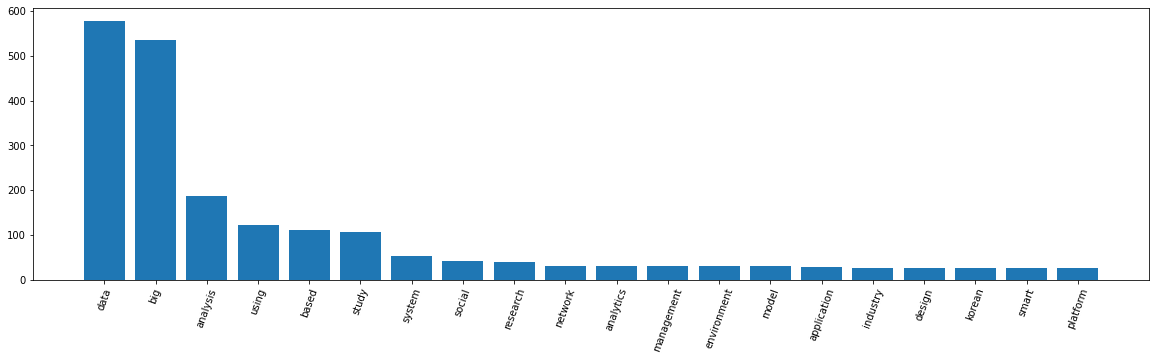

In [30]:
sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
#내림차순이란 소리
sorted_Values = sorted(word_count.values(), reverse=True)

plt.figure(figsize=(20,5))
plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='70')

plt.show()

#### 결과시각화

In [31]:
all_data_concat['doc_count'] = 0
summary_year = all_data_concat.groupby('출판일', as_index=False)['doc_count'].count()
summary_year

,출판일,doc_count
0,2011,1
1,2012,1
2,2013,13
3,2014,33
4,2015,58
5,2016,87
6,2017,39
7,2018,48
8,2019,73
9,2020,62


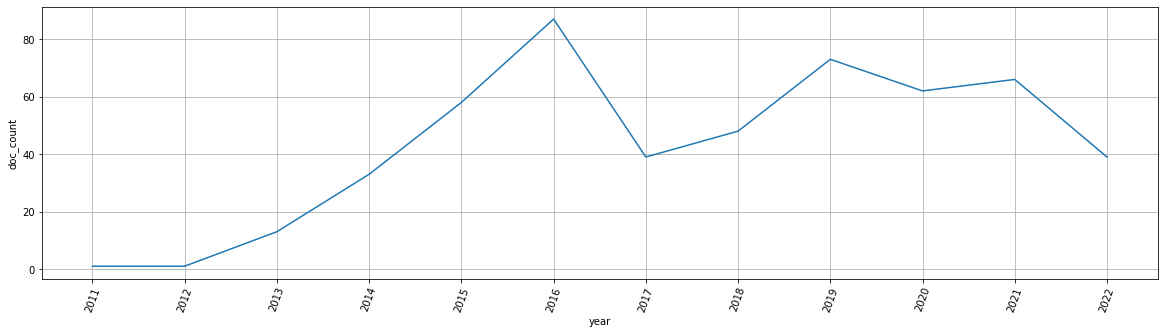

In [32]:
plt.figure(figsize=(20,5))
plt.xlabel('year')
plt.ylabel('doc_count')
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']], rotation='70')
plt.show()

### 워드클라우드

In [34]:
stopwords = set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

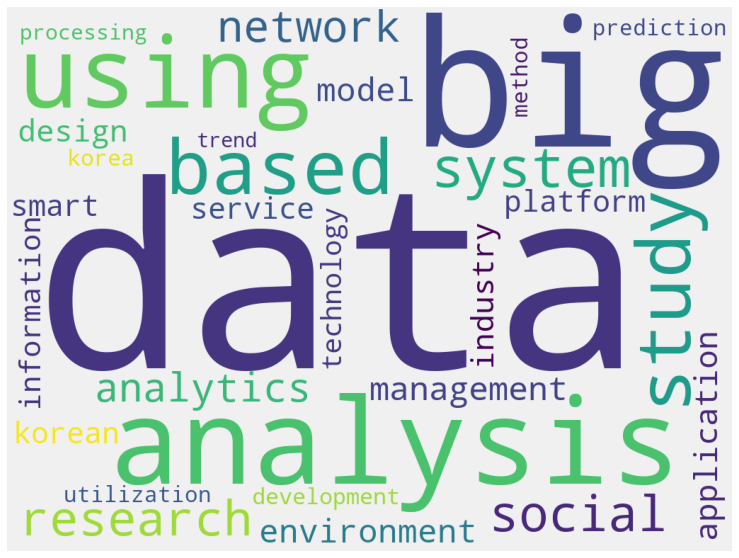

In [45]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color='#f0f0f0', max_words=2000, height=768, width=1024, stopwords=stopwords)
cloud = wc.generate_from_frequencies(word_count)

plt.figure(figsize=(20,10))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [46]:
cloud.to_file('./data/wordcloud.png')

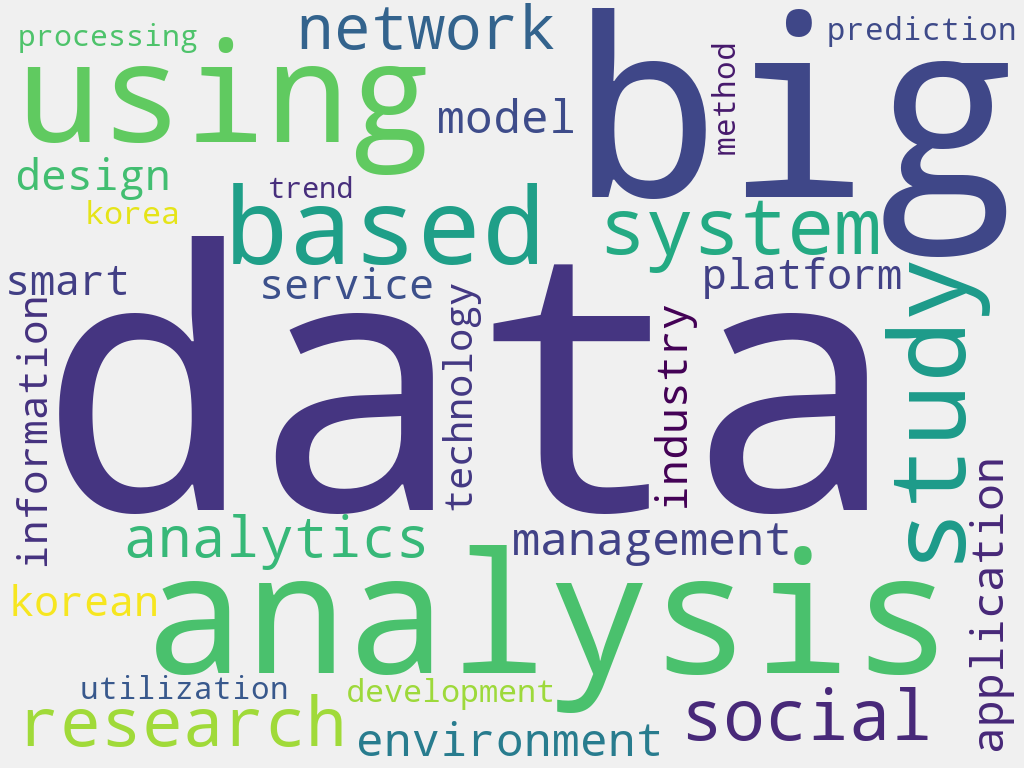

In [48]:
cloud.to_image()


In [50]:
# !pip install KoNLpy

Defaulting to user installation because normal site-packages is not writeable
     --------------------------------------- 19.4/19.4 MB 13.9 MB/s eta 0:00:00
     ---------------------------------------- 3.6/3.6 MB 20.9 MB/s eta 0:00:00
     ------------------------------------- 344.5/344.5 kB 22.3 MB/s eta 0:00:00
